1. Data Exploration

In [ ]:
#Importing the basic libraries

import os
import math
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import geopy.distance
from tqdm import tqdm
from IPython.display import display

from statsmodels.formula import api
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import warnings 
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing the dataset

df = pd.read_csv('/content/drive/MyDrive/ECEN-649-Pattern-Recognition/Final Project/uber.csv')

display(df)

df.drop(['Unnamed: 0','key'], axis=1, inplace=True)
display(df)

target = 'fare_amount'
features = [i for i in df.columns if i not in [target]]

print(target)
print(features)
print('\n\033[1mInference:\033[0m The Dataset consists of {} features & {} samples.'.format(df.shape[1], df.shape[0]))

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


fare_amount
['pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']

Inference: The Dataset consists of 7 features & 200000 samples.


In [ ]:
nan_rows  = df[df.isna().any(axis=1)]
nan_rows

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
87946,24.1,2013-07-02 03:51:57 UTC,-73.950581,40.779692,NaN,NaN,0


In [ ]:
#Check for empty elements

nvc = pd.DataFrame(df.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = round(nvc['Total Null Values']/df.shape[0],3)*100
print(nvc)
df.dropna(inplace=True)

                   Total Null Values  Percentage
fare_amount                        0         0.0
pickup_datetime                    0         0.0
pickup_longitude                   0         0.0
pickup_latitude                    0         0.0
passenger_count                    0         0.0
dropoff_longitude                  1         0.0
dropoff_latitude                   1         0.0


In [ ]:
# Reframing the columns

df = df[(df.pickup_latitude<90) & (df.dropoff_latitude<90) &
        (df.pickup_latitude>-90) & (df.dropoff_latitude>-90) &
        (df.pickup_longitude<180) & (df.dropoff_longitude<180) &
        (df.pickup_longitude>-180) & (df.dropoff_longitude>-180)]

df.pickup_datetime=pd.to_datetime(df.pickup_datetime)

df['year'] = df.pickup_datetime.dt.year
df['month'] = df.pickup_datetime.dt.month
df['weekday'] = df.pickup_datetime.dt.weekday
df['hour'] = df.pickup_datetime.dt.hour

df['Monthly_Quarter'] = df.month.map({1:'Q1',2:'Q1',3:'Q1',4:'Q2',5:'Q2',6:'Q2',7:'Q3',
                                      8:'Q3',9:'Q3',10:'Q4',11:'Q4',12:'Q4'})
df['Hourly_Segments'] = df.hour.map({0:'H1',1:'H1',2:'H1',3:'H1',4:'H2',5:'H2',6:'H2',7:'H2',8:'H3',
                                     9:'H3',10:'H3',11:'H3',12:'H4',13:'H4',14:'H4',15:'H4',16:'H5',
                                     17:'H5',18:'H5',19:'H5',20:'H6',21:'H6',22:'H6',23:'H6'})

df['Distance']=[round(geopy.distance.distance((df.pickup_latitude[i], df.pickup_longitude[i]),(df.dropoff_latitude[i], df.dropoff_longitude[i])).m,2) for i in df.index]

df.drop(['pickup_datetime','month', 'hour',], axis=1, inplace=True)

original_df = df.copy(deep=True)

df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,weekday,Monthly_Quarter,Hourly_Segments,Distance
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,3,Q2,H5,1681.11
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,4,Q3,H6,2454.36
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,0,Q3,H6,5039.60
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,4,Q2,H3,1661.44
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,3,Q3,H5,4483.73


In [ ]:
#Checking the dtypes of all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199987 entries, 0 to 199999
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        199987 non-null  float64
 1   pickup_longitude   199987 non-null  float64
 2   pickup_latitude    199987 non-null  float64
 3   dropoff_longitude  199987 non-null  float64
 4   dropoff_latitude   199987 non-null  float64
 5   passenger_count    199987 non-null  int64  
 6   year               199987 non-null  int64  
 7   weekday            199987 non-null  int64  
 8   Monthly_Quarter    199987 non-null  object 
 9   Hourly_Segments    199987 non-null  object 
 10  Distance           199987 non-null  float64
dtypes: float64(6), int64(3), object(2)
memory usage: 22.3+ MB


In [ ]:
#Checking number of unique rows in each feature
df.nunique().sort_values()

Monthly_Quarter           4
Hourly_Segments           6
year                      7
weekday                   7
passenger_count           8
fare_amount            1244
pickup_longitude      71055
dropoff_longitude     76890
pickup_latitude       83831
dropoff_latitude      90582
Distance             164542
dtype: int64

In [ ]:
#Checking number of unique rows in each feature

nu = df.drop([target], axis=1).nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; #numerical & categorical features

for i in range(df.drop([target], axis=1).shape[1]):
    if nu.values[i]<=24:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('\n\033[1mInference:\033[0m The Datset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))


Inference: The Datset has 5 numerical & 5 categorical features.


In [ ]:
#Checking the stats of all the columns

display(df.describe())

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,weekday,Distance
count,199987.000000,199987.000000,199987.000000,199987.000000,199987.000000,199987.000000,199987.000000,199987.000000,1.999870e+05
mean,11.359849,-72.501786,39.917937,-72.511608,39.922031,1.684544,2011.742463,3.048383,2.056346e+04
std,9.901868,10.449955,6.130412,10.412192,6.117669,1.385999,1.856438,1.946960,3.796638e+05
min,-52.000000,-93.824668,-74.015515,-75.458979,-74.015750,0.000000,2009.000000,0.000000,0.000000e+00
25%,6.000000,-73.992064,40.734793,-73.991407,40.733823,1.000000,2010.000000,1.000000,1.215530e+03
50%,8.500000,-73.981822,40.752592,-73.980092,40.753042,1.000000,2012.000000,3.000000,2.121280e+03
75%,12.500000,-73.967154,40.767157,-73.963658,40.768000,2.000000,2013.000000,5.000000,3.874255e+03
max,499.000000,40.808425,48.018760,40.831932,45.031598,208.000000,2015.000000,6.000000,8.783594e+06


2. Exploratory Data Analysis

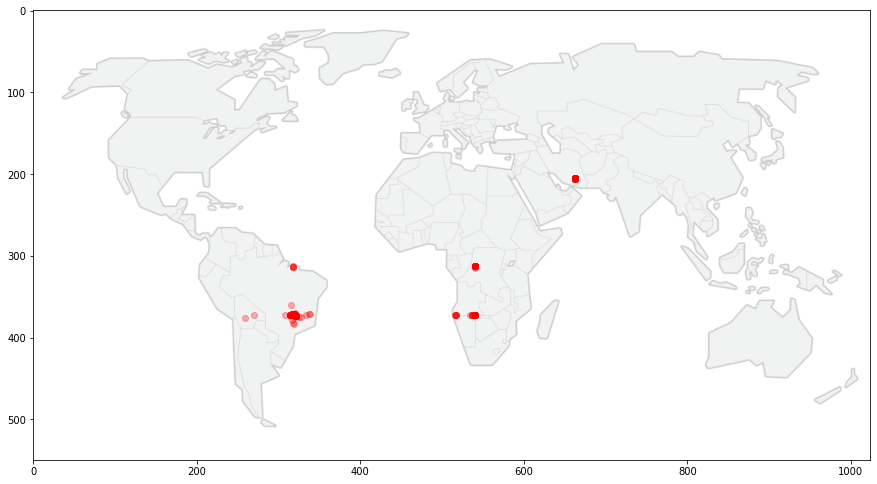

In [ ]:
plt.figure(figsize=[15,10])
a=plt.imread('https://raw.githubusercontent.com/Masterx-AI/Project_Uber_Fare_Prediction/main/wm.png')
plt.imshow(a, alpha=0.2)
plt.scatter( (df.pickup_longitude+180)*3,(df.pickup_latitude+215)*1.45555555,alpha=0.3, color='red')
#mdf.plot(kind='scatter',x='pickup_latitude',y='pickup_longitude',alpha=0.1)
plt.show()

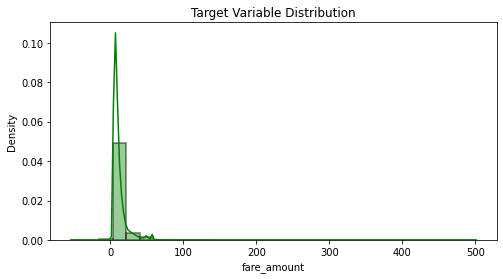

In [ ]:
#Let us first analyze the distribution of the target variable

plt.figure(figsize=[8,4])
sns.distplot(df[target], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Target Variable Distribution')
plt.show()

                               Visualising Categorical Features:                                


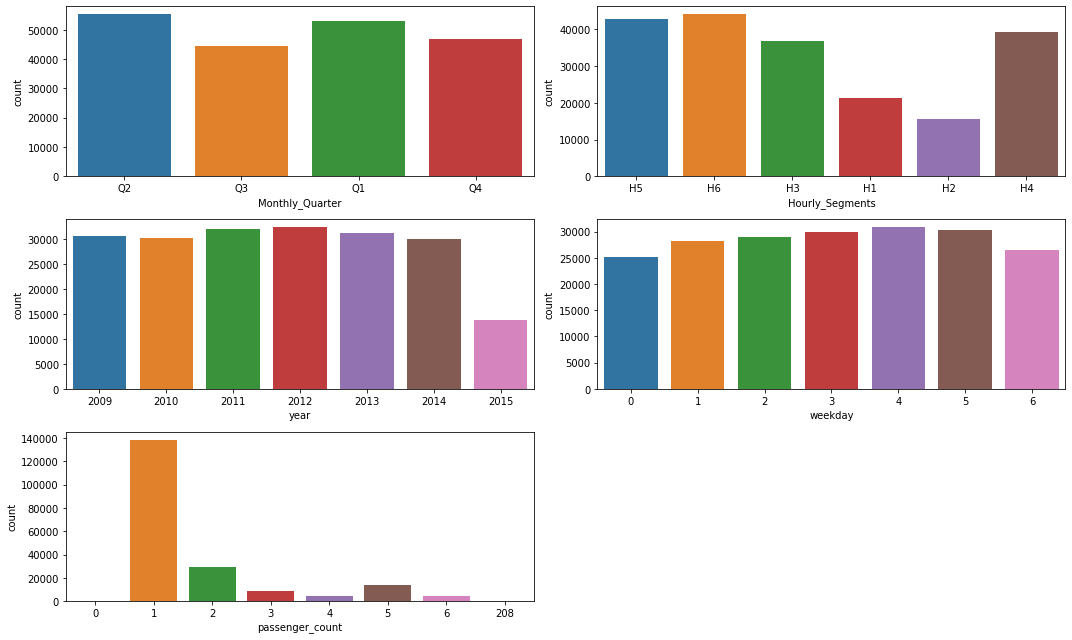

In [ ]:
#Visualising the categorical features 

print('\033[1mVisualising Categorical Features:'.center(100))

n=2
plt.figure(figsize=[15,3*math.ceil(len(cf)/n)])

for i in range(len(cf)):
    if df[cf[i]].nunique()<=12:
        plt.subplot(math.ceil(len(cf)/n),n,i+1)
        sns.countplot(df[cf[i]])
    else:
        plt.subplot(3,1,i-3)
        sns.countplot(df[cf[i]])
        #plt.subplot(4,2,8)
        #sns.countplot(df[cf[i]])
        
plt.tight_layout()
plt.show()

                                 Numeric Features Distribution                                  


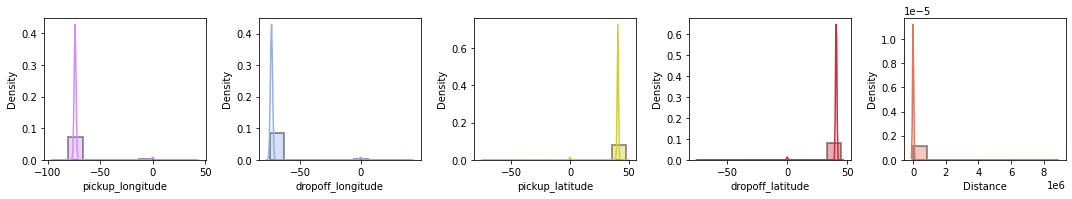

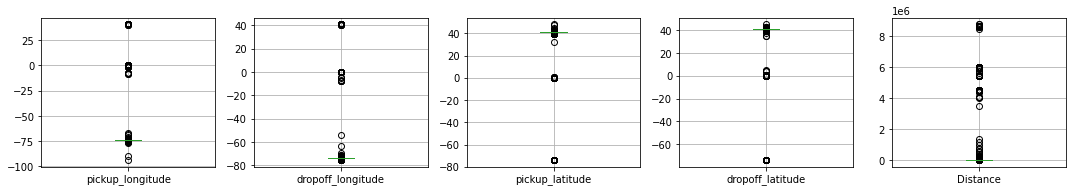

In [ ]:
#Visualising the numeric features 

print('\033[1mNumeric Features Distribution'.center(100))

n=5

plt.figure(figsize=[15,5*math.ceil(len(nf)/n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),n,i+1)
    sns.distplot(df[nf[i]],hist_kws=dict(edgecolor="black", linewidth=2), bins=10, color=list(np.random.randint([255,255,255])/255))
plt.tight_layout()
plt.show()

plt.figure(figsize=[15,5*math.ceil(len(nf)/n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),n,i+1)
    df.boxplot(nf[i])
plt.tight_layout()
plt.show()

In [ ]:
#Understanding the relationship between all the features

# g = sns.pairplot(df)
# plt.title('Pairplots for all the Feature')
# #g.map_upper(sns.kdeplot, levels=4, color=".2")
# plt.show()

3. Data Preprocessing

In [ ]:
#Removal of any Duplicate rows (if any)

counter = 0
rs,cs = original_df.shape

df.drop_duplicates(inplace=True)
df.drop(['pickup_latitude','pickup_longitude',
         'dropoff_latitude','dropoff_longitude'],axis=1)

if df.shape==(rs,cs):
    print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped/fixed ---> {rs-df.shape[0]}')


Inference: Number of duplicates dropped/fixed ---> 109


In [ ]:
# Since only one pair of values are missing in the dataset, we can just drop them
df.dropna(inplace=True)

In [ ]:
#Converting categorical Columns to Numeric

df1 = df.copy()
df3 = df1.copy()

ecc = nvc[nvc['Percentage']!=0].index.values
fcc = [i for i in cf if i not in ecc]
#One-Hot Binary Encoding
oh=True
dm=True
for i in fcc:
    #print(i)
    if df3[i].nunique()==2:
        if oh==True: print("\033[1mOne-Hot Encoding on features:\033[0m")
        print(i);oh=False
        df3[i]=pd.get_dummies(df3[i], drop_first=True, prefix=str(i))
    if (df3[i].nunique()>2 and df3[i].nunique()<17):
        if dm==True: print("\n\033[1mDummy Encoding on features:\033[0m")
        print(i);dm=False
        df3 = pd.concat([df3.drop([i], axis=1), pd.DataFrame(pd.get_dummies(df3[i], drop_first=True, prefix=str(i)))],axis=1)
        
df3.shape


Dummy Encoding on features:
Monthly_Quarter
Hourly_Segments
year
weekday
passenger_count


(199878, 33)

In [ ]:
#Removal of outlier:

df1 = df3.copy()

#features1 = [i for i in features if i not in ['CHAS','RAD']]
features1 = nf

for i in features1:
    Q1 = df1[i].quantile(0.25)
    Q3 = df1[i].quantile(0.75)
    IQR = Q3 - Q1
    df1 = df1[df1[i] <= (Q3+(1.5*IQR))]
    df1 = df1[df1[i] >= (Q1-(1.5*IQR))]
    df1 = df1.reset_index(drop=True)
display(df1.head())
print('\n\033[1mInference:\033[0m\nBefore removal of outliers, The dataset had {} samples.'.format(df3.shape[0]))
print('After removal of outliers, The dataset now has {} samples.'.format(df1.shape[0]))

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,Distance,Monthly_Quarter_Q2,Monthly_Quarter_Q3,Monthly_Quarter_Q4,Hourly_Segments_H2,...,weekday_4,weekday_5,weekday_6,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,passenger_count_208
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1681.11,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,7.7,-73.994355,40.728225,-73.994710,40.750325,2454.36,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
2,12.9,-74.005043,40.740770,-73.962565,40.772647,5039.60,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,1661.44,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,4.9,-73.969019,40.755910,-73.969019,40.755910,0.00,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0



Inference:
Before removal of outliers, The dataset had 199878 samples.
After removal of outliers, The dataset now has 163203 samples.


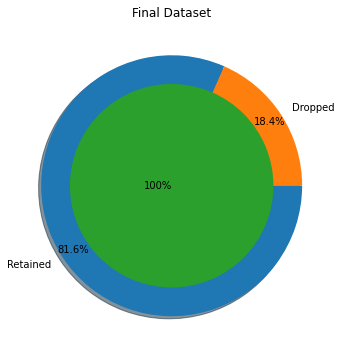


Inference: After the cleanup process, 36784 samples were dropped, while retaining 18.39% of the data.


In [ ]:
#Final Dataset size after performing Preprocessing

df = df1.copy()
df.columns=[i.replace('-','_') for i in df.columns]

plt.title('Final Dataset')
plt.pie([df.shape[0], original_df.shape[0]-df.shape[0]], radius = 1, labels=['Retained','Dropped'], counterclock=False, 
        autopct='%1.1f%%', pctdistance=0.9, explode=[0,0], shadow=True)
plt.pie([df.shape[0]], labels=['100%'], labeldistance=-0, radius=0.78)
plt.show()

print(f'\n\033[1mInference:\033[0m After the cleanup process, {original_df.shape[0]-df.shape[0]} samples were dropped, \
while retaining {round(100 - (df.shape[0]*100/(original_df.shape[0])),2)}% of the data.')

4. Data Manipulation

In [ ]:
#Splitting the data intro training & testing sets

m=[]
for i in df.columns.values:
    m.append(i.replace(' ','_'))
    
df.columns = m
X = df.drop([target],axis=1)
Y = df[target]
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=100)
Train_X.reset_index(drop=True,inplace=True)

print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',Train_X.shape,Train_Y.shape,'\nTesting set   ---> ', Test_X.shape,'', Test_Y.shape)

Original set  --->  (163203, 32) (163203,) 
Training set  --->  (130562, 32) (130562,) 
Testing set   --->  (32641, 32)  (32641,)


In [ ]:
#Feature Scaling (Standardization)

std = StandardScaler()

print('\033[1mStandardardization on Training set'.center(100))
Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)
display(Train_X_std.describe())

print('\n','\033[1mStandardardization on Testing set'.center(100))
Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)
display(Test_X_std.describe())

                               Standardardization on Training set                               


,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,Distance,Monthly_Quarter_Q2,Monthly_Quarter_Q3,Monthly_Quarter_Q4,Hourly_Segments_H2,Hourly_Segments_H3,...,weekday_4,weekday_5,weekday_6,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,passenger_count_208
count,1.305620e+05,1.305620e+05,1.305620e+05,1.305620e+05,1.305620e+05,1.305620e+05,1.305620e+05,1.305620e+05,1.305620e+05,1.305620e+05,...,1.305620e+05,1.305620e+05,1.305620e+05,1.305620e+05,1.305620e+05,1.305620e+05,1.305620e+05,1.305620e+05,1.305620e+05,1.305620e+05
mean,-6.304811e-13,-2.329963e-15,-1.254833e-13,1.805402e-14,-8.463960e-17,3.570074e-17,-1.414968e-17,6.312936e-18,6.639467e-17,4.767355e-17,...,2.634018e-17,-2.019051e-17,6.530624e-19,8.032667e-17,1.088437e-17,4.070755e-17,-1.904765e-18,-5.703411e-17,1.262587e-17,4.081640e-19
std,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,...,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00
min,-2.961437e+00,-2.897556e+00,-2.919757e+00,-2.867446e+00,-1.622863e+00,-6.155085e-01,-5.316226e-01,-5.558634e-01,-2.767434e-01,-4.873355e-01,...,-4.292020e-01,-4.216941e-01,-3.801548e-01,-1.505327e+00,-4.122782e-01,-2.171248e-01,-1.483366e-01,-2.738455e-01,-1.464379e-01,-2.767536e-03
25%,-6.783829e-01,-6.847366e-01,-6.710313e-01,-6.636110e-01,-7.629052e-01,-6.155085e-01,-5.316226e-01,-5.558634e-01,-2.767434e-01,-4.873355e-01,...,-4.292020e-01,-4.216941e-01,-3.801548e-01,-1.505327e+00,-4.122782e-01,-2.171248e-01,-1.483366e-01,-2.738455e-01,-1.464379e-01,-2.767536e-03
50%,-6.341797e-02,3.271920e-02,-6.532058e-02,4.834418e-02,-2.347775e-01,-6.155085e-01,-5.316226e-01,-5.558634e-01,-2.767434e-01,-4.873355e-01,...,-4.292020e-01,-4.216941e-01,-3.801548e-01,6.643075e-01,-4.122782e-01,-2.171248e-01,-1.483366e-01,-2.738455e-01,-1.464379e-01,-2.767536e-03
75%,6.429738e-01,6.539807e-01,6.174684e-01,6.350862e-01,5.652279e-01,1.624673e+00,-5.316226e-01,-5.558634e-01,-2.767434e-01,-4.873355e-01,...,-4.292020e-01,-4.216941e-01,-3.801548e-01,6.643075e-01,-4.122782e-01,-2.171248e-01,-1.483366e-01,-2.738455e-01,-1.464379e-01,-2.767536e-03
max,3.255964e+00,2.807711e+00,3.137233e+00,2.805374e+00,2.933357e+00,1.624673e+00,1.881034e+00,1.799003e+00,3.613456e+00,2.051975e+00,...,2.329905e+00,2.371387e+00,2.630507e+00,6.643075e-01,2.425547e+00,4.605646e+00,6.741425e+00,3.651694e+00,6.828835e+00,3.613323e+02



                                Standardardization on Testing set                                


,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,Distance,Monthly_Quarter_Q2,Monthly_Quarter_Q3,Monthly_Quarter_Q4,Hourly_Segments_H2,Hourly_Segments_H3,...,weekday_4,weekday_5,weekday_6,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,passenger_count_208
count,32641.000000,32641.000000,32641.000000,32641.000000,32641.000000,32641.000000,32641.000000,32641.000000,32641.000000,32641.000000,...,32641.000000,32641.000000,32641.000000,32641.000000,32641.000000,32641.000000,32641.000000,32641.000000,32641.000000,3.264100e+04
mean,0.009496,0.003957,0.002645,0.010718,0.003829,-0.004419,0.008474,-0.004463,0.001664,0.002463,...,-0.001824,0.000336,-0.000882,-0.005507,0.003732,-0.006578,0.000262,0.001559,0.013835,-2.767536e-03
std,1.002215,1.000929,0.993715,1.001776,1.001768,0.997773,1.005681,0.997227,1.002787,1.001937,...,0.998279,1.000343,0.999022,1.002313,1.003758,0.985453,1.000877,1.002644,1.045127,8.673750e-19
min,-2.708732,-2.887521,-2.876670,-2.857408,-1.622863,-0.615509,-0.531623,-0.555863,-0.276743,-0.487335,...,-0.429202,-0.421694,-0.380155,-1.505327,-0.412278,-0.217125,-0.148337,-0.273845,-0.146438,-2.767536e-03
25%,-0.674309,-0.688962,-0.664415,-0.652657,-0.762707,-0.615509,-0.531623,-0.555863,-0.276743,-0.487335,...,-0.429202,-0.421694,-0.380155,-1.505327,-0.412278,-0.217125,-0.148337,-0.273845,-0.146438,-2.767536e-03
50%,-0.048188,0.048564,-0.060663,0.060627,-0.230528,-0.615509,-0.531623,-0.555863,-0.276743,-0.487335,...,-0.429202,-0.421694,-0.380155,0.664307,-0.412278,-0.217125,-0.148337,-0.273845,-0.146438,-2.767536e-03
75%,0.653268,0.661489,0.621690,0.657956,0.574644,1.624673,-0.531623,-0.555863,-0.276743,-0.487335,...,-0.429202,-0.421694,-0.380155,0.664307,-0.412278,-0.217125,-0.148337,-0.273845,-0.146438,-2.767536e-03
max,3.252830,2.800652,3.132185,2.804325,2.932838,1.624673,1.881034,1.799003,3.613456,2.051975,...,2.329905,2.371387,2.630507,0.664307,2.425547,4.605646,6.741425,3.651694,6.828835,-2.767536e-03


5. Feature Selection / Feature Extraction

                                       Correlation Matrix                                       


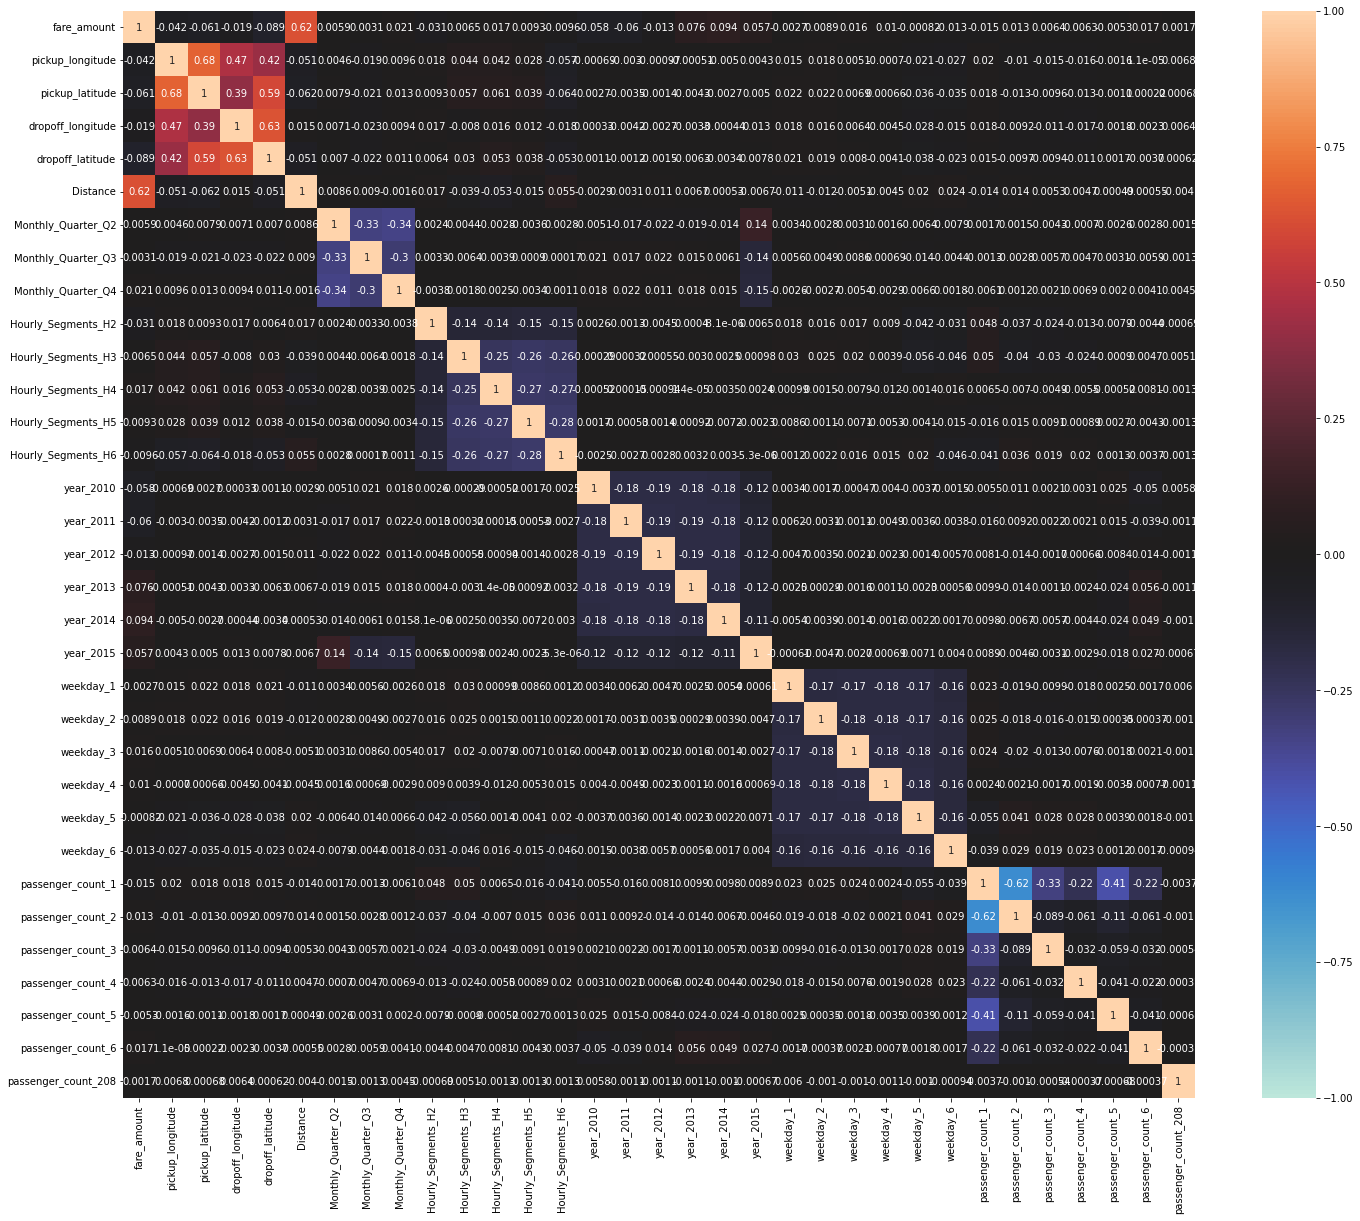

In [ ]:
#Checking the correlation using Heatmap

print('\033[1mCorrelation Matrix'.center(100))
plt.figure(figsize=[24,20])
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, center=0) #cmap='BuGn'
plt.show()

In [ ]:
#Testing a Linear Regression model with statsmodels

Train_xy = pd.concat([Train_X,Train_Y.reset_index(drop=True)],axis=1)
a = Train_xy.columns.values

API = api.ols(formula='{} ~ {}'.format(target,' + '.join(i for i in Train_X.columns)), data=Train_xy).fit()
API.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            fare_amount   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     3436.
Date:                Tue, 13 Dec 2022   Prob (F-statistic):               0.00
Time:                        02:10:37   Log-Likelihood:            -3.3661e+05
No. Observations:              130562   AIC:                         6.733e+05
Df Residuals:                  130529   BIC:                         6.736e+05
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1036.8864     85.753     12.092      0.000     868.812    1204.961
pickup_longitude        0.7547      0.802      0.941      0.347      -0.817       2.327
pickup_latitude         1.1043      0.663      1.665      0.096      -0.195       2.404
dropoff_longitude       4.4888      0.729      6.153      0.000       3.059       5.919
dropoff_latitude      -16.9776      0.604    -28.113      0.000     -18.161     -15.794
Distance                0.0021    6.6e-06    314.210      0.000       0.002       0.002
Monthly_Quarter_Q2      0.1479      0.024      6.174      0.000       0.101       0.195
Monthly_Quarter_Q3      0.3185      0.026     12.348      0.000       0.268       0.369
Monthly_Quarter_Q4      0.5197      0.025     20.525      0.000       0.470       0.569
Hourly_Segments_H2     -0.2480      0.045     -5.563      0.000      -0.335      -0.161
Hourly_Segments_H3      0.8033      0.036     22.239      0.000       0.733       0.874
Hourly_Segments_H4      0.9938      0.035     28.006      0.000       0.924       1.063
Hourly_Segments_H5      0.7011      0.035     20.017      0.000       0.632       0.770
Hourly_Segments_H6      0.0871      0.035      2.494      0.013       0.019       0.156
year_2010               0.1195      0.032      3.756      0.000       0.057       0.182
year_2011               0.0771      0.032      2.445      0.015       0.015       0.139
year_2012               0.5323      0.031     16.912      0.000       0.471       0.594
year_2013               1.4822      0.032     46.623      0.000       1.420       1.544
year_2014               1.7470      0.032     54.333      0.000       1.684       1.810
year_2015               1.9042      0.041     45.907      0.000       1.823       1.985
weekday_1               0.2489      0.034      7.300      0.000       0.182       0.316
weekday_2               0.3675      0.034     10.824      0.000       0.301       0.434
weekday_3               0.4200      0.034     12.465      0.000       0.354       0.486
weekday_4               0.3504      0.034     10.453      0.000       0.285       0.416
weekday_5               0.0497      0.034      1.464      0.143      -0.017       0.116
weekday_6              -0.1686      0.036     -4.732      0.000      -0.238      -0.099
passenger_count_1       0.2151      0.148      1.451      0.147      -0.075       0.506
passenger_count_2       0.3693      0.150      2.467      0.014       0.076       0.663
passenger_count_3       0.3946      0.154      2.569      0.010       0.094       0.696
passenger_count_4       0.4779      0.160      2.993      0.003       0.165       0.791
passenger_count_5       0.3229      0.152      2.130      0.033       0.026       0.620
passenger_count_6       0.2356      0.160      1.470      0.141      -0.078       0.550
pas

**Inference**: 

We can fix these multicollinearity with two techniques:

Manual Method - Variance Inflation Factor (VIF)

Automatic Method - Recursive Feature Elimination (RFE)

Feature Elimination using PCA Decomposition

5(a): Manual Method - Variance Inflation Factor (VIF)

100%|██████████| 31/31 [04:13<00:00,  8.19s/it]


Dropped Features -->  ['passenger_count_1', 'Hourly_Segments_H5', 'pickup_latitude', 'weekday_4', 'dropoff_longitude', 'year_2012', 'Monthly_Quarter_Q4', 'Hourly_Segments_H6', 'weekday_5', 'year_2011', 'pickup_longitude', 'weekday_1', 'Monthly_Quarter_Q2', 'year_2013', 'Hourly_Segments_H3']


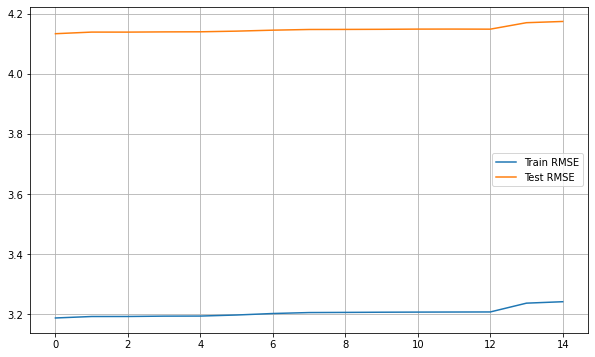

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
Trr=[]; Tss=[]; n=3
order=['ord-'+str(i) for i in range(2,n)]
#Trd = pd.DataFrame(np.zeros((10,n-2)), columns=order)
#Tsd = pd.DataFrame(np.zeros((10,n-2)), columns=order)

DROP=[];b=[]

for i in tqdm(range(len(Train_X_std.columns)-1)):
    vif = pd.DataFrame()
    X = Train_X_std.drop(DROP,axis=1)
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    vif.reset_index(drop=True, inplace=True)
    if vif.loc[0][1]>=1.1:
        DROP.append(vif.loc[0][0])
        LR = LinearRegression()
        LR.fit(Train_X_std.drop(DROP,axis=1), Train_Y)

        pred1 = LR.predict(Train_X_std.drop(DROP,axis=1))
        pred2 = LR.predict(Test_X_std.drop(DROP,axis=1))
        
        Trr.append(np.sqrt(mean_squared_error(Train_Y, pred1)))
        Tss.append(np.sqrt(mean_squared_error(Test_Y, pred2)))

        #Trd.loc[i,'ord-'+str(k)] = round(np.sqrt(mean_squared_error(Train_Y, pred1)),2)
        #Tsd.loc[i,'ord-'+str(k)] = round(np.sqrt(mean_squared_error(Test_Y, pred2)),2)
        
print('Dropped Features --> ',DROP)

plt.plot(Trr, label='Train RMSE')
plt.plot(Tss, label='Test RMSE')
plt.legend()
plt.grid()
plt.show()

5(b): Automatic Method - RFE

100%|██████████| 31/31 [01:03<00:00,  2.04s/it]


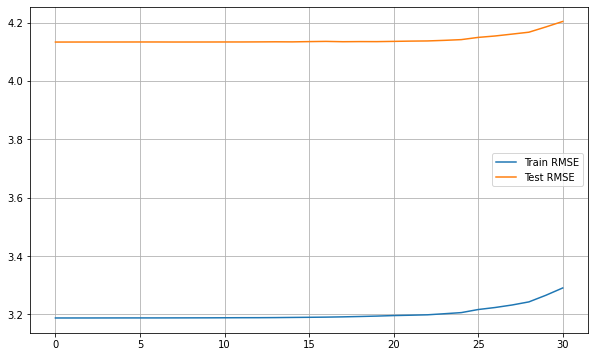

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
Trr=[]; Tss=[]; n=3
order=['ord-'+str(i) for i in range(2,n)]
Trd = pd.DataFrame(np.zeros((10,n-2)), columns=order)
Tsd = pd.DataFrame(np.zeros((10,n-2)), columns=order)

m=df.shape[1]-2
for i in tqdm(range(m)):
    lm = LinearRegression()
    #lm.fit(Train_X_std, Train_Y)

    rfe = RFE(lm,n_features_to_select=Train_X_std.shape[1]-i)             # running RFE
    rfe = rfe.fit(Train_X_std, Train_Y)

    LR = LinearRegression()
    LR.fit(Train_X_std.loc[:,rfe.support_], Train_Y)

    pred1 = LR.predict(Train_X_std.loc[:,rfe.support_])
    pred2 = LR.predict(Test_X_std.loc[:,rfe.support_])

    Trr.append(np.sqrt(mean_squared_error(Train_Y, pred1)))
    Tss.append(np.sqrt(mean_squared_error(Test_Y, pred2)))


plt.plot(Trr, label='Train RMSE')
plt.plot(Tss, label='Test RMSE')
#plt.ylim([19.75,20.75])
plt.legend()
plt.grid()
plt.show()

5(c): Feature Elimination using PCA Decomposition

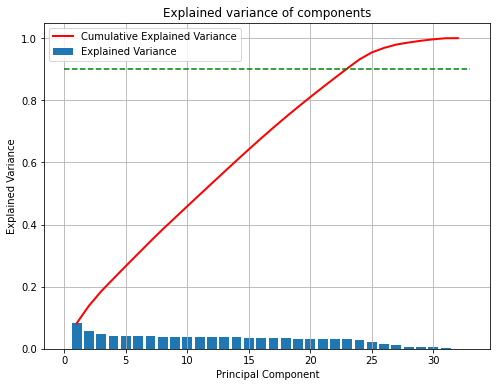

In [ ]:
from sklearn.decomposition import PCA

pca = PCA().fit(Train_X_std)

fig, ax = plt.subplots(figsize=(8,6))
x_values = range(1, pca.n_components_+1)
ax.bar(x_values, pca.explained_variance_ratio_, lw=2, label='Explained Variance')
ax.plot(x_values, np.cumsum(pca.explained_variance_ratio_), lw=2, label='Cumulative Explained Variance', color='red')
plt.plot([0,pca.n_components_+1],[0.9,0.9],'g--')
ax.set_title('Explained variance of components')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained Variance')
plt.legend()
plt.grid()
plt.show()

100%|██████████| 29/29 [00:37<00:00,  1.30s/it]


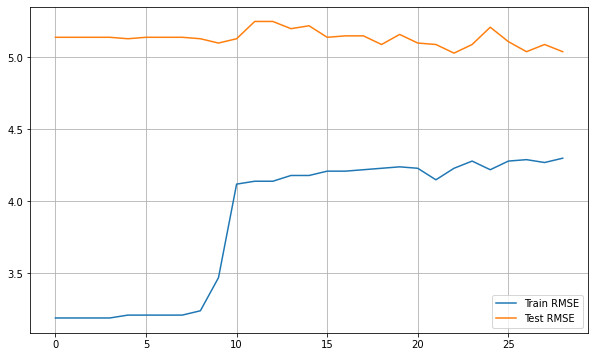

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
Trr=[]; Tss=[]; n=3
order=['ord-'+str(i) for i in range(2,n)]
Trd = pd.DataFrame(np.zeros((10,n-2)), columns=order)
Tsd = pd.DataFrame(np.zeros((10,n-2)), columns=order)
m=df.shape[1]-4

for i in tqdm(range(m)):
    pca = PCA(n_components=Train_X_std.shape[1]-i)
    Train_X_std_pca = pca.fit_transform(Train_X_std)
    Test_X_std_pca = pca.fit_transform(Test_X_std)
    
    LR = LinearRegression()
    LR.fit(Train_X_std_pca, Train_Y)

    pred1 = LR.predict(Train_X_std_pca)
    pred2 = LR.predict(Test_X_std_pca)

    Trr.append(round(np.sqrt(mean_squared_error(Train_Y, pred1)),2))
    Tss.append(round(np.sqrt(mean_squared_error(Test_Y, pred2)),2))

plt.plot(Trr, label='Train RMSE')
plt.plot(Tss, label='Test RMSE')
#plt.ylim([19.5,20.75])
plt.legend()
plt.grid()
plt.show()

**Inference**:

It can be seen that the performance of the models is quiet comparable upon dropping features using VIF, RFE & PCA Techniques. Comparing the RMSE plots, the optimal values were found for dropping most features using manual RFE Technique.

In [ ]:
#Shortlisting the selected Features (with RFE)

lm = LinearRegression()
rfe = RFE(lm,n_features_to_select=df.shape[1]-23)           
rfe = rfe.fit(Train_X_std, Train_Y)

LR = LinearRegression()
LR.fit(Train_X_std.loc[:,rfe.support_], Train_Y)

pred1 = LR.predict(Train_X_std.loc[:,rfe.support_])
pred2 = LR.predict(Test_X_std.loc[:,rfe.support_])

print(np.sqrt(mean_squared_error(Train_Y, pred1)))
print(np.sqrt(mean_squared_error(Test_Y, pred2)))

Train_X_std = Train_X_std.loc[:,rfe.support_]
Test_X_std = Test_X_std.loc[:,rfe.support_]

3.198334765136796
4.137026089981123


6. Predictive Modelling

In [ ]:
#Let us first define a function to evaluate our models
from sklearn.metrics import mean_absolute_error

Model_Evaluation_Comparison_Matrix = pd.DataFrame(np.zeros([7,10]), columns=['Train-R2','Test-R2','Train-RSS','Test-RSS',
                                                                            'Train-MSE','Test-MSE','Train-RMSE','Test-RMSE', 
                                                                            'Train-MAE', 'Test-MAE'])
rc=np.random.choice(Train_X_std.loc[:,Train_X_std.nunique()>50].columns,3)
def Evaluate(n, pred1,pred2):
    #Plotting predicted predicteds alongside the actual datapoints 
    plt.figure(figsize=[15,6])
    for e,i in enumerate(rc):
        plt.subplot(2,3,e+1)
        plt.scatter(y=Train_Y, x=Train_X_std[i], label='Actual')
        plt.scatter(y=pred1, x=Train_X_std[i], label='Prediction')
        plt.legend()
    plt.show()

    #Evaluating the Multiple Linear Regression Model

    print('\n\n{}Training Set Metrics{}'.format('-'*20, '-'*20))

    print('\nR2-Score on Training set --->',round(r2_score(Train_Y, pred1),20))
    print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Train_Y-pred1)),20))
    print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Train_Y, pred1),20))
    print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Train_Y, pred1)),20))
    print('Mean Absolute Error (MAE) on Training set --->',round(mean_absolute_error(Train_Y, pred1),20))

    print('\n{}Testing Set Metrics{}'.format('-'*20, '-'*20))
    print('\nR2-Score on Testing set --->',round(r2_score(Test_Y, pred2),20))
    print('Residual Sum of Squares (RSS) on Testing set  --->',round(np.sum(np.square(Test_Y-pred2)),20))
    print('Mean Squared Error (MSE) on Testing set       --->',round(mean_squared_error(Test_Y, pred2),20))
    print('Root Mean Squared Error (RMSE) on Testing set --->',round(np.sqrt(mean_squared_error(Test_Y, pred2)),20))
    print('Mean Absolute Error (MAE) on Testing set --->',round(mean_absolute_error(Test_Y, pred2),20))

    print('\n{}Residual Plots{}'.format('-'*20, '-'*20))
    
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-R2']  = round(r2_score(Train_Y, pred1),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-R2']   = round(r2_score(Test_Y, pred2),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-RSS'] = round(np.sum(np.square(Train_Y-pred1)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-RSS']  = round(np.sum(np.square(Test_Y-pred2)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-MSE'] = round(mean_squared_error(Train_Y, pred1),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-MSE']  = round(mean_squared_error(Test_Y, pred2),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-RMSE']= round(np.sqrt(mean_squared_error(Train_Y, pred1)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-RMSE'] = round(np.sqrt(mean_squared_error(Test_Y, pred2)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-MAE']= round(mean_absolute_error(Train_Y, pred1),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-MAE'] = round(mean_absolute_error(Test_Y, pred2),20)

    # Plotting y_test and y_pred to understand the spread.
    plt.figure(figsize=[15,4])

    plt.subplot(1,2,1)
    sns.distplot((Train_Y - pred1))
    plt.title('Error Terms')          
    plt.xlabel('Errors') 

    plt.subplot(1,2,2)
    plt.scatter(Train_Y,pred1)
    plt.plot([Train_Y.min(),Train_Y.max()],[Train_Y.min(),Train_Y.max()], 'r--')
    plt.title('Test vs Prediction')         
    plt.xlabel('y_test')                       
    plt.ylabel('y_pred')                       
    plt.show()

Building different Regression Models and analyse the metrics to determine the performance:

6(a): Multiple Linear Regression (MLR)

<<<------------------------- Evaluating Multiple Linear Regression Model ------------------------->>>

The Coeffecient of the Regresion Model was found to be  [-0.30499538  2.79702093  0.15508619  0.32086946  0.39552625  0.29085972
  0.16782406  0.50924681  0.59332707  0.44376597]
The Intercept of the Regresion Model was found to be  8.550616948269791


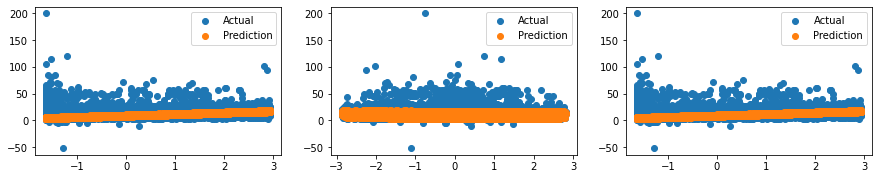



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.4535189574339896
Residual Sum of Squares (RSS) on Training set  ---> 1335563.7771264177
Mean Squared Error (MSE) on Training set       ---> 10.229345269882645
Root Mean Squared Error (RMSE) on Training set ---> 3.198334765136796
Mean Absolute Error (MAE) on Training set ---> 1.6641048767434818

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.3282075840111336
Residual Sum of Squares (RSS) on Testing set  ---> 558650.2211150512
Mean Squared Error (MSE) on Testing set       ---> 17.114984869184497
Root Mean Squared Error (RMSE) on Testing set ---> 4.137026089981123
Mean Absolute Error (MAE) on Testing set ---> 1.6737389144366903

--------------------Residual Plots--------------------


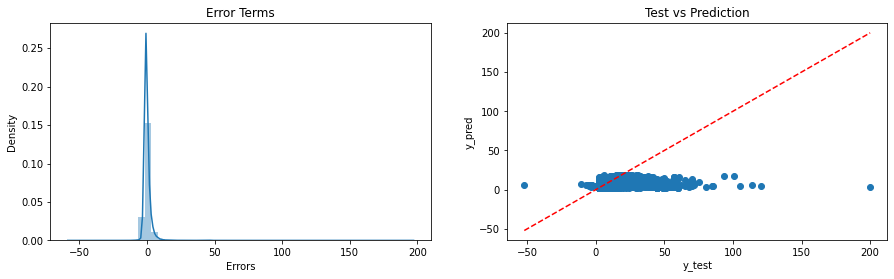

In [ ]:
#Linear Regression

MLR = LinearRegression().fit(Train_X_std,Train_Y)
pred1 = MLR.predict(Train_X_std)
pred2 = MLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Multiple Linear Regression Model \033[0m{}{}\n'.format('<'*3,'-'*25 ,'-'*25,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(0, pred1, pred2)

6(b): Ridge Regression Model

<<<------------------------- Evaluating Ridge Regression Model ------------------------->>>

The Coeffecient of the Regresion Model was found to be  [-0.30499538  2.79702093  0.15508619  0.32086946  0.39552625  0.29085972
  0.16782406  0.50924681  0.59332707  0.44376597]
The Intercept of the Regresion Model was found to be  8.550616948269791


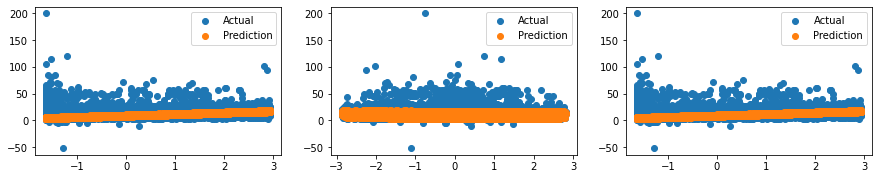



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.453518957400977
Residual Sum of Squares (RSS) on Training set  ---> 1335563.7772070984
Mean Squared Error (MSE) on Training set       ---> 10.229345270500593
Root Mean Squared Error (RMSE) on Training set ---> 3.1983347652334007
Mean Absolute Error (MAE) on Training set ---> 1.6641066881951652

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.3282076469313049
Residual Sum of Squares (RSS) on Testing set  ---> 558650.1687917936
Mean Squared Error (MSE) on Testing set       ---> 17.11498326619263
Root Mean Squared Error (RMSE) on Testing set ---> 4.137025896243898
Mean Absolute Error (MAE) on Testing set ---> 1.67374069007493

--------------------Residual Plots--------------------


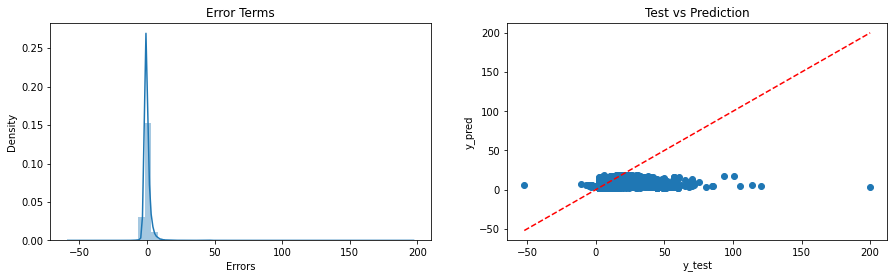

In [ ]:
#Creating a Ridge Regression model

RLR = Ridge().fit(Train_X_std,Train_Y)
pred1 = RLR.predict(Train_X_std)
pred2 = RLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Ridge Regression Model \033[0m{}{}\n'.format('<'*3,'-'*25 ,'-'*25,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(1, pred1, pred2)

6(c): Lasso Regression Model

<<<------------------------- Evaluating Lasso Regression Model ------------------------->>>

The Coeffecient of the Regresion Model was found to be  [-0.30499538  2.79702093  0.15508619  0.32086946  0.39552625  0.29085972
  0.16782406  0.50924681  0.59332707  0.44376597]
The Intercept of the Regresion Model was found to be  8.550616948269791


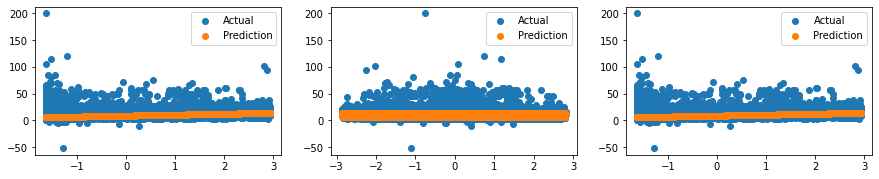



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.3585502318636644
Residual Sum of Squares (RSS) on Training set  ---> 1567661.1052167423
Mean Squared Error (MSE) on Training set       ---> 12.007024288971845
Root Mean Squared Error (RMSE) on Training set ---> 3.4651153355944504
Mean Absolute Error (MAE) on Training set ---> 2.0581138498848635

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.26226052163439884
Residual Sum of Squares (RSS) on Testing set  ---> 613490.5856410798
Mean Squared Error (MSE) on Testing set       ---> 18.79509162222603
Root Mean Squared Error (RMSE) on Testing set ---> 4.335330624326827
Mean Absolute Error (MAE) on Testing set ---> 2.0662766198872484

--------------------Residual Plots--------------------


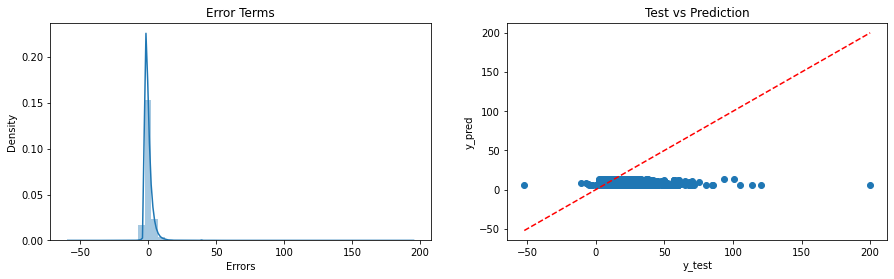

In [ ]:
#Creating a Lasso Regression model

LLR = Lasso().fit(Train_X_std,Train_Y)
pred1 = LLR.predict(Train_X_std)
pred2 = LLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Lasso Regression Model \033[0m{}{}\n'.format('<'*3,'-'*25 ,'-'*25,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(2, pred1, pred2)

6(d): Elastic Net Regression Model

<<<------------------------- Evaluating Elastic-Net Regression Model ------------------------->>>

The Coeffecient of the Regresion Model was found to be  [-0.30499538  2.79702093  0.15508619  0.32086946  0.39552625  0.29085972
  0.16782406  0.50924681  0.59332707  0.44376597]
The Intercept of the Regresion Model was found to be  8.550616948269791


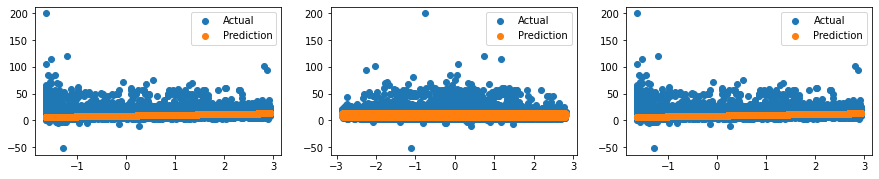



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.32729497804639207
Residual Sum of Squares (RSS) on Training set  ---> 1644046.8928137543
Mean Squared Error (MSE) on Training set       ---> 12.592078038125598
Root Mean Squared Error (RMSE) on Training set ---> 3.5485318144446154
Mean Absolute Error (MAE) on Training set ---> 2.1621931623453072

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.23952090035803764
Residual Sum of Squares (RSS) on Testing set  ---> 632400.4365887307
Mean Squared Error (MSE) on Testing set       ---> 19.374419796842336
Root Mean Squared Error (RMSE) on Testing set ---> 4.401638308271402
Mean Absolute Error (MAE) on Testing set ---> 2.170452954864075

--------------------Residual Plots--------------------


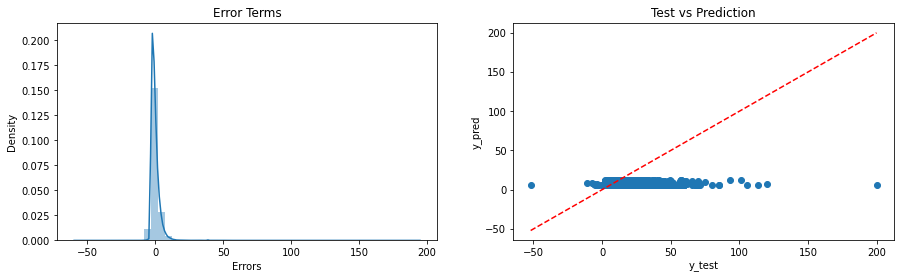

In [ ]:
#Creating a ElasticNet Regression model

ENR = ElasticNet().fit(Train_X_std,Train_Y)
pred1 = ENR.predict(Train_X_std)
pred2 = ENR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Elastic-Net Regression Model \033[0m{}{}\n'.format('<'*3,'-'*25 ,'-'*25,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(3, pred1, pred2)

6(e): Polynomial Regression Model

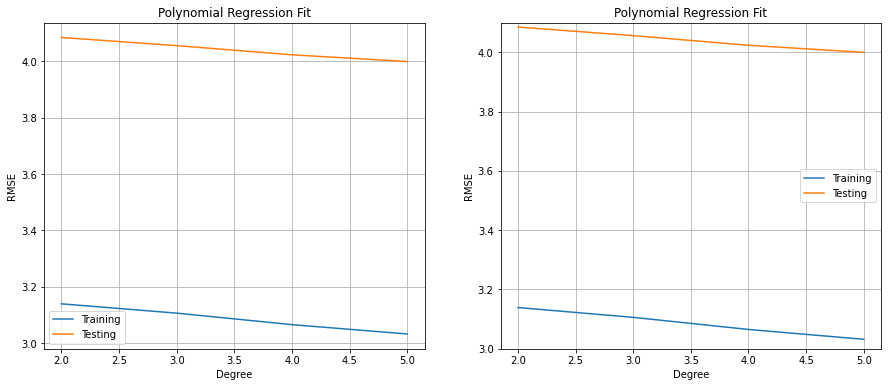

In [ ]:
#Checking polynomial regression performance on various degrees

Trr=[]; Tss=[]
n_degree=6

for i in range(2,n_degree):
    #print(f'{i} Degree')
    poly_reg = PolynomialFeatures(degree=i)
    X_poly = poly_reg.fit_transform(Train_X_std)
    X_poly1 = poly_reg.fit_transform(Test_X_std)
    LR = LinearRegression()
    LR.fit(X_poly, Train_Y)
    
    pred1 = LR.predict(X_poly)
    Trr.append(np.sqrt(mean_squared_error(Train_Y, pred1)))
    
    pred2 = LR.predict(X_poly1)
    Tss.append(np.sqrt(mean_squared_error(Test_Y, pred2)))

plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
plt.plot(range(2,n_degree),Trr, label='Training')
plt.plot(range(2,n_degree),Tss, label='Testing')
#plt.plot([1,4],[1,4],'b--')
plt.title('Polynomial Regression Fit')
#plt.ylim([0,5])
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.grid()
plt.legend()
#plt.xticks()

plt.subplot(1,2,2)
plt.plot(range(2,n_degree),Trr, label='Training')
plt.plot(range(2,n_degree),Tss, label='Testing')
plt.title('Polynomial Regression Fit')
plt.ylim([3,4.1])
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.grid()
plt.legend()
#plt.xticks()
plt.show()

**Inference**:

We can choose 5th order polynomial regression for optimal training & testing scores

<<<------------------------- Evaluating Polynomial Regression Model ------------------------->>>

The Coeffecient of the Regresion Model was found to be  [-0.30499538  2.79702093  0.15508619  0.32086946  0.39552625  0.29085972
  0.16782406  0.50924681  0.59332707  0.44376597]
The Intercept of the Regresion Model was found to be  8.550616948269791


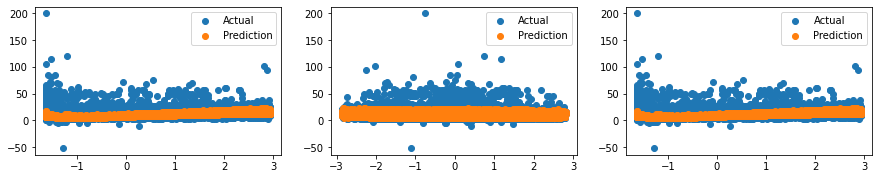



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.5088550636671112
Residual Sum of Squares (RSS) on Training set  ---> 1200325.9677686493
Mean Squared Error (MSE) on Training set       ---> 9.193532327696031
Root Mean Squared Error (RMSE) on Training set ---> 3.0320838259678817
Mean Absolute Error (MAE) on Training set ---> 1.5936591673605134

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.372066844173485
Residual Sum of Squares (RSS) on Testing set  ---> 522177.66678951046
Mean Squared Error (MSE) on Testing set       ---> 15.997600158987483
Root Mean Squared Error (RMSE) on Testing set ---> 3.999700008624082
Mean Absolute Error (MAE) on Testing set ---> 1.6094166661147369

--------------------Residual Plots--------------------


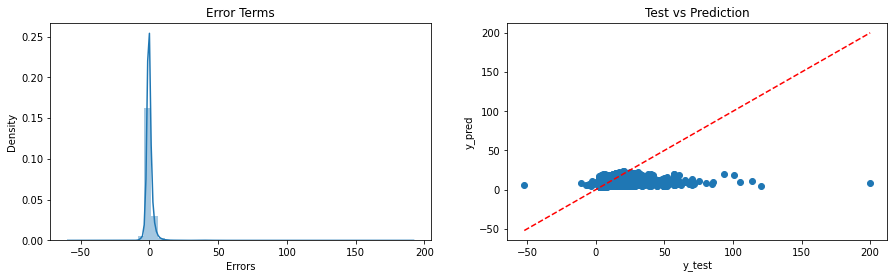

In [ ]:
#Using the 5th Order Polynomial Regression model (degree=5)

poly_reg = PolynomialFeatures(degree=5)
X_poly = poly_reg.fit_transform(Train_X_std)
X_poly1 = poly_reg.fit_transform(Test_X_std)
PR = LinearRegression()
PR.fit(X_poly, Train_Y)

pred1 = PR.predict(X_poly)
pred2 = PR.predict(X_poly1)

print('{}{}\033[1m Evaluating Polynomial Regression Model \033[0m{}{}\n'.format('<'*3,'-'*25 ,'-'*25,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(4, pred1, pred2)

[02:22:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
<<<------------------------- Evaluating XG-Boost Regression Model ------------------------->>>

The Coefficient of the Regresion Model was found to be  [-0.30499538  2.79702093  0.15508619  0.32086946  0.39552625  0.29085972
  0.16782406  0.50924681  0.59332707  0.44376597]
The Intercept of the Regresion Model was found to be  8.550616948269791


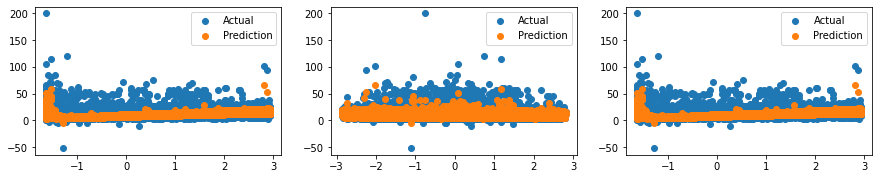



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.5752098054503061
Residual Sum of Squares (RSS) on Training set  ---> 1038159.3367907647
Mean Squared Error (MSE) on Training set       ---> 7.9514662519781
Root Mean Squared Error (RMSE) on Training set ---> 2.819834436979962
Mean Absolute Error (MAE) on Training set ---> 1.5341824356151472

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.3661461332531336
Residual Sum of Squares (RSS) on Testing set  ---> 527101.2211287536
Mean Squared Error (MSE) on Testing set       ---> 16.148439726992237
Root Mean Squared Error (RMSE) on Testing set ---> 4.0185121285112775
Mean Absolute Error (MAE) on Testing set ---> 1.5808542269733634

--------------------Residual Plots--------------------


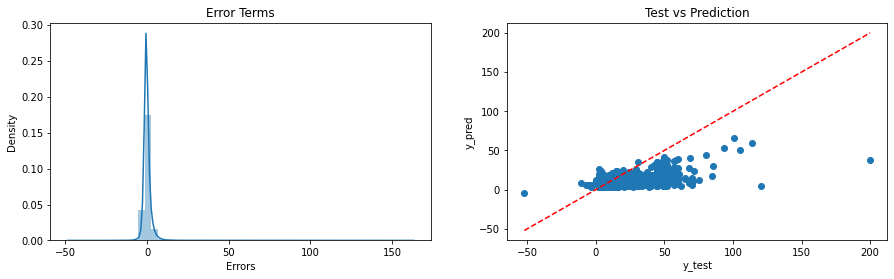

In [ ]:
#Creating a XGBoost Regression model
import xgboost as xgb
reg = xgb.XGBRegressor(n_estimators=600,seed=126)

XG_R = reg.fit(Train_X_std,Train_Y)
pred1 = XG_R.predict(Train_X_std)
pred2 = XG_R.predict(Test_X_std)

print('{}{}\033[1m Evaluating XG-Boost Regression Model \033[0m{}{}\n'.format('<'*3,'-'*25 ,'-'*25,'>'*3))
print('The Coefficient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(5, pred1, pred2)

<<<------------------------- Evaluating Random Forest Regression model ------------------------->>>

The Coeffecient of the Regresion Model was found to be [-0.30499538  2.79702093  0.15508619  0.32086946  0.39552625  0.29085972 
 0.16782406  0.50924681  0.59332707  0.44376597]
The Intercept of the Regresion Model was found to be 8.550616948269791


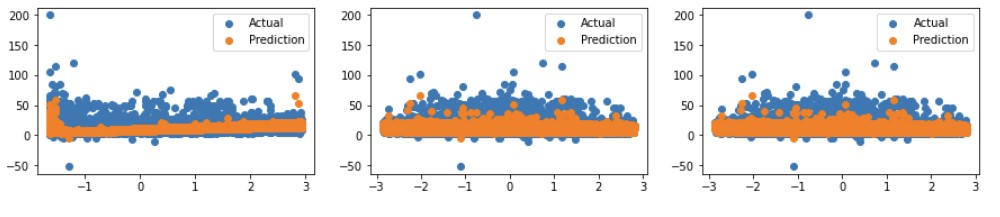



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.924098234382645
Residual Sum of Squares (RSS) on Training set  ---> 856312.7647654341
Mean Squared Error (MSE) on Training set       ---> 1.421179524318223
Root Mean Squared Error (RMSE) on Training set ---> 1.1921323434578193
Mean Absolute Error (MAE) on Training set ---> 0.6284913841718571

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.8294721634278164
Residual Sum of Squares (RSS) on Testing set  ---> 381321.1328001241
Mean Squared Error (MSE) on Testing set       ---> 9.200998569340822
Root Mean Squared Error (RMSE) on Testing set ---> 3.033314782435343
Mean Absolute Error (MAE) on Testing set ---> 1.7133875817481743

--------------------Residual Plots--------------------


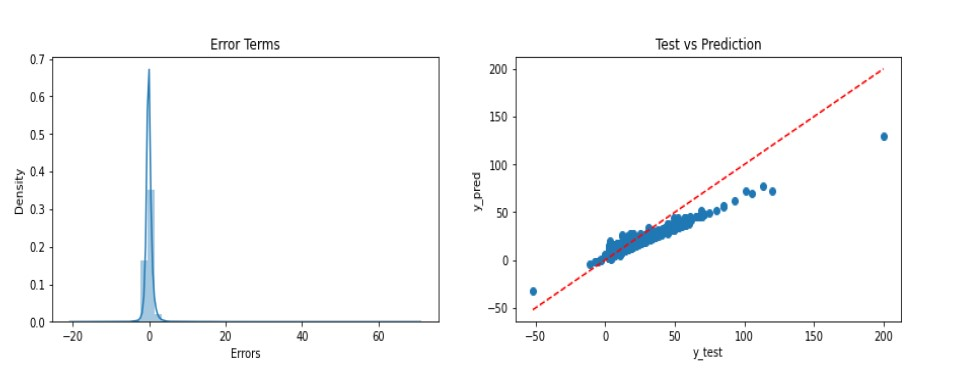

In [ ]:
#Creating a Random Forest Regression model
from sklearn.ensemble import RandomForestRegressor 
reg = RandomForestRegressor(n_estimators=800)

RF = reg.fit(Train_X_std,Train_Y)
pred1 = RF.predict(Train_X_std)
pred2 = RF.predict(Test_X_std)

print('{}{}\033[1m Evaluating Random Forest Regression model \033[0m{}{}\n'.format('<'*3,'-'*25 ,'-'*25,'>'*3))
print('The Coefficient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(6, pred1, pred2)

**Inference**: 

The random forest performs the best on the current dataset.